Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as scaler

Reading and Exploring the Data Set


In [2]:
cd=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [3]:
cd.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
cd.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [5]:
cd.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
cd.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
cd.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
cd['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

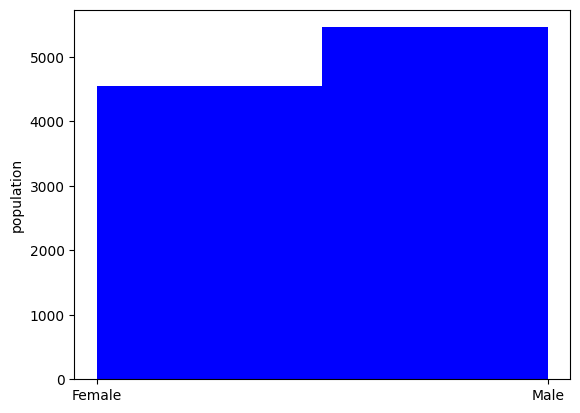

In [9]:
plt.hist(cd['Gender'],bins=2,color='blue')
plt.ylabel('population')
plt.show()

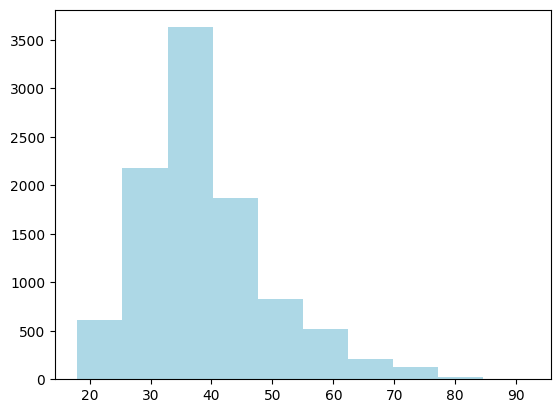

In [10]:
plt.hist(cd['Age'], color='lightblue');

In [11]:
d=cd['Geography'].value_counts()
d

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

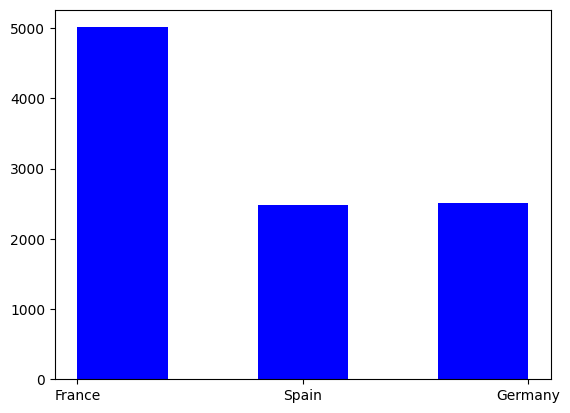

In [12]:
plt.hist(cd['Geography'],bins=5,color='blue');

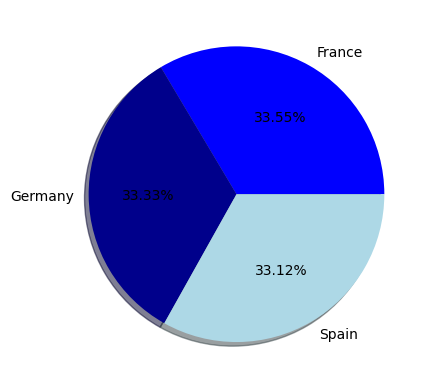

In [91]:
plt.pie(cd['Geography'].value_counts(), colors=['blue','darkblue','lightblue'], shadow=True,
       labels=['France','Germany','Spain'],
       autopct='%1.2f%%');

In [14]:
a = len(cd[(cd['Geography']=='France') & (cd['Exited']==1)])
b = len(cd[(cd['Geography']=='Germany') & (cd['Exited']==1)])
c = len(cd[(cd['Geography']=='Spain') & (cd['Exited']==1)])
print('Exited from France',a,'which is',a/d[0]*100,'%')
print('Exited from Germany',b,'which is',b/d[1]*100,'%')
print('Exited from Spain',c,'which is',c/d[2]*100,'%')

Exited from France 810 which is 16.15476665337056 %
Exited from Germany 814 which is 32.44320446392985 %
Exited from Spain 413 which is 16.673395236172787 %


In [15]:
cd_other = cd[cd['Geography']!='France']
len(cd_other)

4986

In [16]:
cd_france = cd[cd['Geography']=='France']
len(cd_france)

5014

In [17]:
cd_france = resample(cd_france, replace=False,
                     n_samples=int(np.mean([len(cd[cd['Geography']=='Germany']),len(cd[cd['Geography']=='Spain'])])))
len(cd_france)

2493

In [89]:
#cd = pd.concat([cd_other,cd_france])
#cd.groupby('Geography').size().plot(kind='pie', autopct='%1.2f%%');

In [19]:
g = cd['HasCrCard'].value_counts()
g

1    5288
0    2191
Name: HasCrCard, dtype: int64

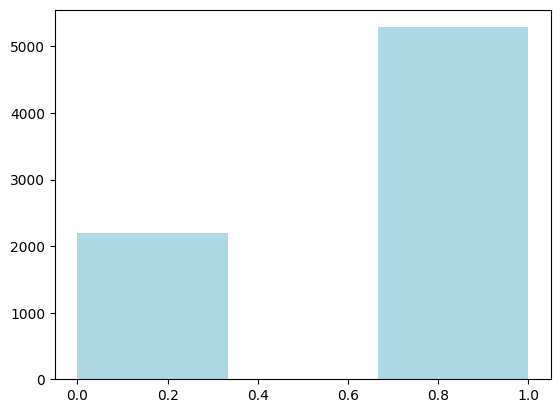

In [20]:
plt.hist(cd['HasCrCard'], bins=3, color='lightblue');

In [21]:
e = len(cd[(cd['HasCrCard']==1) & (cd['Exited']==1)])
f = len(cd[(cd['HasCrCard']==0) & (cd['Exited']==1)])
print('Exited having a credit card is',e,'which is',e/g[0]*100,'%')
print('Exited without having a credit card is',f,'which is',f/g[1]*100,'%')

Exited having a credit card is 1140 which is 52.031036056595156 %
Exited without having a credit card is 497 which is 9.398638426626324 %


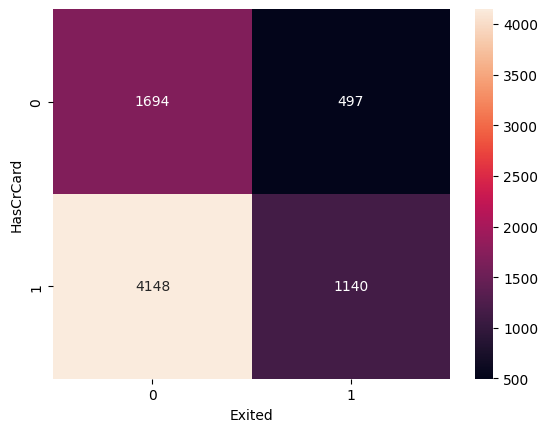

In [22]:
sb.heatmap(pd.crosstab(cd['HasCrCard'], cd['Exited']), annot=True, fmt='g'); #the fmt parameter is used to format
                                                                             #the annotations from scientific
                                                                             #notation to integers.

In [23]:
h = cd['IsActiveMember'].value_counts()
h

1    3861
0    3618
Name: IsActiveMember, dtype: int64

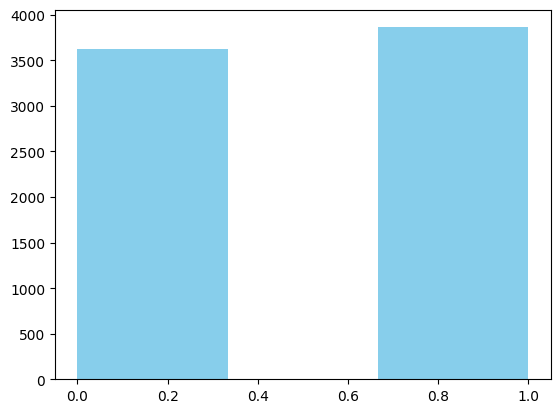

In [24]:
plt.hist(cd['IsActiveMember'], bins=3, color='skyblue');

In [25]:
i = len(cd[(cd['IsActiveMember']==1)&(cd['Exited']==1)])
j = i = len(cd[(cd['IsActiveMember']==0)&(cd['Exited']==1)])
print('Exited being an Active member',i,'which is',i/h[0]*100,'%')
print('Exited not being an Active member',j,'which is',j/h[1]*100,'%')

Exited being an Active member 1046 which is 28.9110005527916 %
Exited not being an Active member 1046 which is 27.09142709142709 %


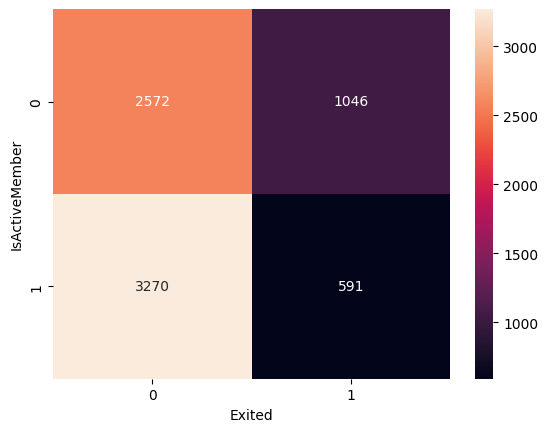

In [26]:
sb.heatmap(pd.crosstab(cd['IsActiveMember'], cd['Exited']), annot=True, fmt='g');

In [27]:
pd.crosstab([cd['Geography'],cd['Gender'],cd['HasCrCard']], cd['Exited'])

Exited                        0    1
Geography Gender HasCrCard          
France    Female 0          258   71
                 1          622  161
          Male   0          334   54
                 1          869  124
Germany   Female 0          219  131
                 1          526  317
          Male   0          262  106
                 1          688  260
Spain     Female 0          244   74
                 1          614  157
          Male   0          377   61
                 1          829  121

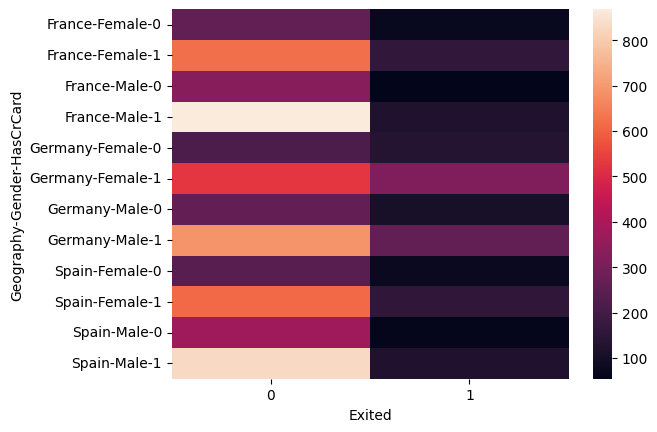

In [94]:
sb.heatmap(pd.crosstab([cd['Geography'],cd['Gender'],cd['HasCrCard']], cd['Exited']));

In [29]:
cd['Tenure'].value_counts()

8     784
1     778
2     775
3     773
5     770
7     754
9     737
4     729
6     717
10    361
0     301
Name: Tenure, dtype: int64

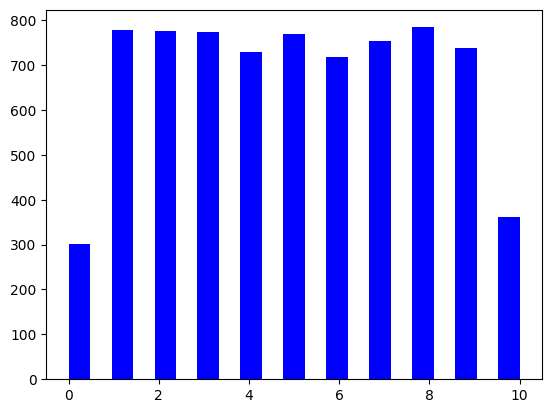

In [30]:
plt.hist(cd['Tenure'],bins=21,color='blue');

In [31]:
df_ten = cd[(cd['Tenure']==0) | (cd['Tenure']==10)]
df_others = cd[(cd['Tenure']!=0) | (cd['Tenure']!=10)]

In [32]:
df_ten['Tenure'].value_counts()

10    361
0     301
Name: Tenure, dtype: int64

In [33]:
df_ten = resample(df_ten, replace=True, n_samples = 400)

In [34]:
df = pd.concat([df_ten, df_others])

In [35]:
df['Tenure'].value_counts()

8     784
1     778
2     775
3     773
5     770
7     754
9     737
4     729
6     717
10    580
0     482
Name: Tenure, dtype: int64

In [92]:
#df.groupby('Tenure').size().plot(kind='pie', autopct='%1.0f%%');

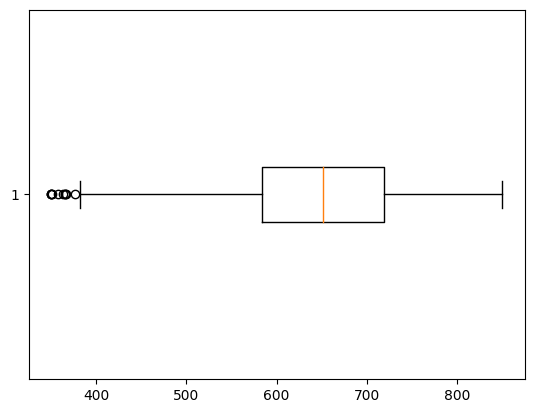

In [37]:
plt.boxplot(df['CreditScore'], vert=0); #outliers are seen to the left of the 400 mark.

In [38]:
df = df[df['CreditScore']>=390]

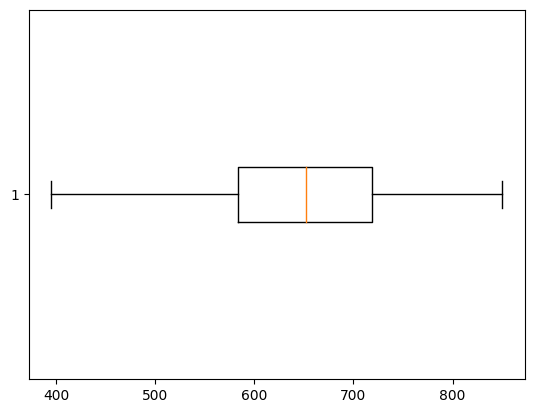

In [39]:
plt.boxplot(df['CreditScore'], vert=0);

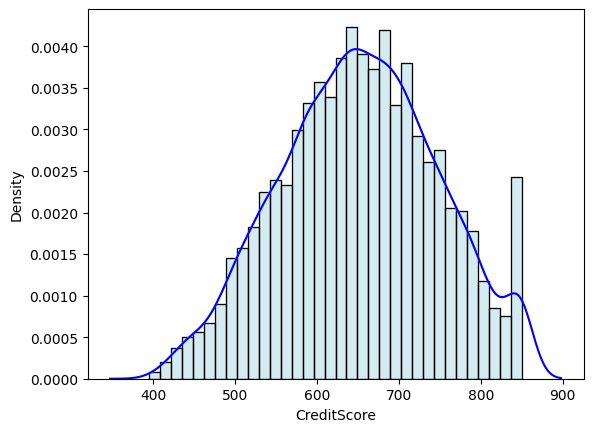

In [40]:
sb.histplot(df['CreditScore'], kde=True, color='lightblue', stat='density')
sb.kdeplot(df['CreditScore'], color='blue');

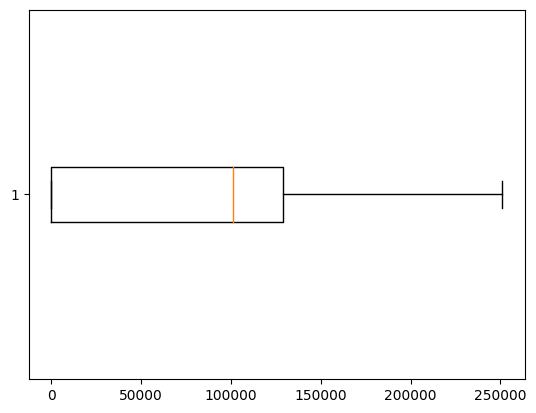

In [41]:
plt.boxplot(df['Balance'], vert=0); #shows negative skewness

In [42]:
df['Balance'].skew()

-0.2735713862788517

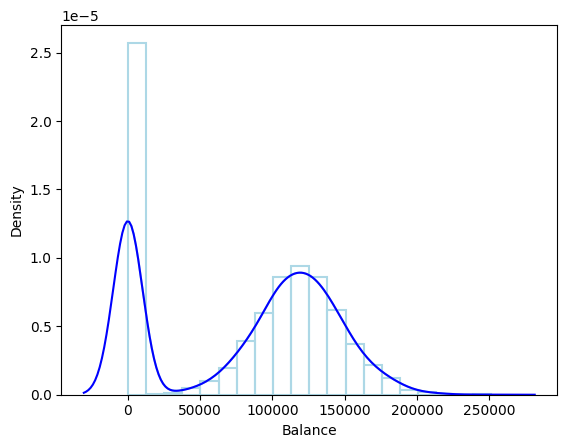

In [43]:
sb.histplot(df['Balance'], kde=True, color='lightblue', stat='density', fill=False)
sb.kdeplot(df['Balance'], color='blue');

In [44]:
a1 = len(df[df['Balance']==0])
b1 = len(df['Balance'])
print("%.2f" %(a1/b1*100),'% of the data has 0 Balance.')

32.25 % of the data has 0 Balance.


In [45]:
df = df[df['Balance']!=0]

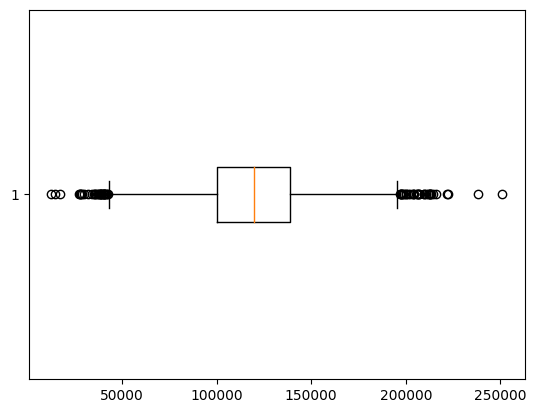

In [46]:
plt.boxplot(df['Balance'], vert=0);

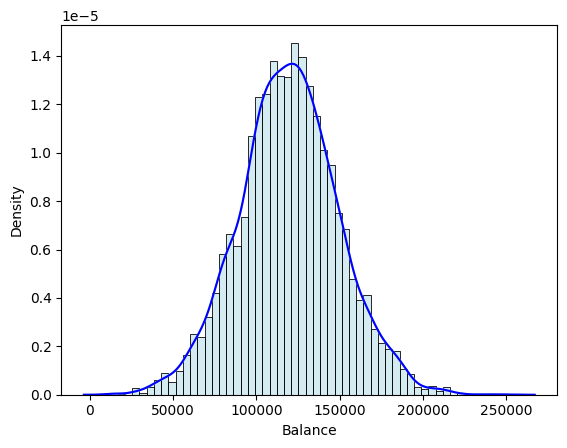

In [47]:
sb.histplot(df['Balance'], kde=True, color='lightblue', stat='density')
sb.kdeplot(df['Balance'], color='blue');

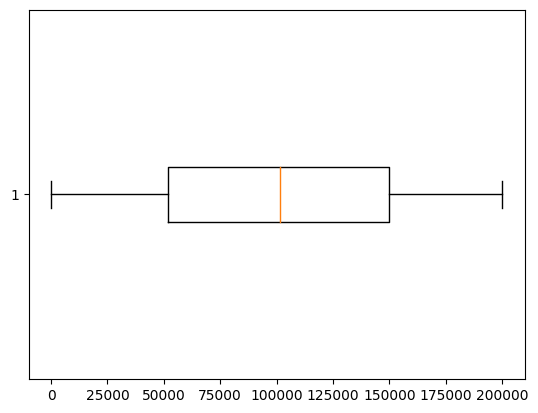

In [48]:
plt.boxplot(df['EstimatedSalary'], vert=0);

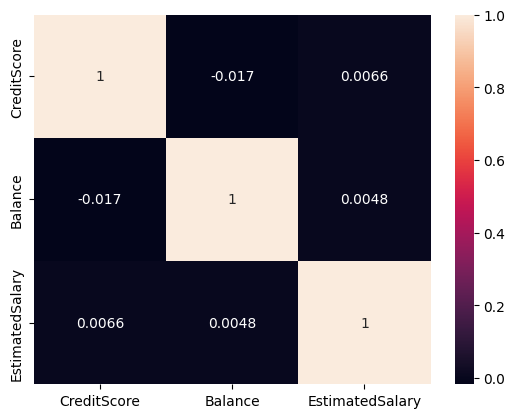

In [49]:
corr = df[['CreditScore','Balance','EstimatedSalary']]
corr = corr.corr()
sb.heatmap(corr, annot=True);

In [50]:
df['NumOfProducts'].value_counts()

1    3385
2    1753
3     152
4      39
Name: NumOfProducts, dtype: int64

In [51]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,2452,933
2,1523,230
3,10,142
4,0,39


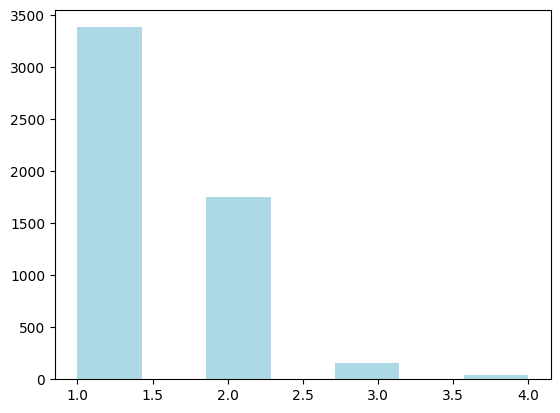

In [52]:
plt.hist(df['NumOfProducts'], bins=7, color='lightblue');

In [53]:
df.drop(df[df['NumOfProducts']==4].index, inplace=True)

In [54]:
df['NumOfProducts'].value_counts()

1    3385
2    1753
3     152
Name: NumOfProducts, dtype: int64

In [55]:
#split into independent and dependent variables from here
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [56]:
x.shape

(5290, 10)

In [57]:
df_corr = df.corr(numeric_only=True)
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.018340,-0.002388,-0.018877,-0.001056,-0.018778,0.026895,0.007686,-0.027029
Age,-0.018340,1.000000,0.008453,-0.010333,-0.013867,-0.025374,0.056517,-0.014018,0.298840
Tenure,-0.002388,0.008453,1.000000,-0.005226,0.003364,0.042043,-0.044138,0.006468,-0.007023
Balance,-0.018877,-0.010333,-0.005226,1.000000,0.000864,0.014618,-0.010691,0.005185,0.023739
NumOfProducts,-0.001056,-0.013867,0.003364,0.000864,1.000000,0.007768,0.003020,0.023831,0.005291
HasCrCard,-0.018778,-0.025374,0.042043,0.014618,0.007768,1.000000,-0.013874,0.006203,-0.009555
IsActiveMember,0.026895,0.056517,-0.044138,-0.010691,0.003020,-0.013874,1.000000,0.003751,-0.180289
EstimatedSalary,0.007686,-0.014018,0.006468,0.005185,0.023831,0.006203,0.003751,1.000000,-0.012499
Exited,-0.027029,0.298840,-0.007023,0.023739,0.005291,-0.009555,-0.180289,-0.012499,1.000000


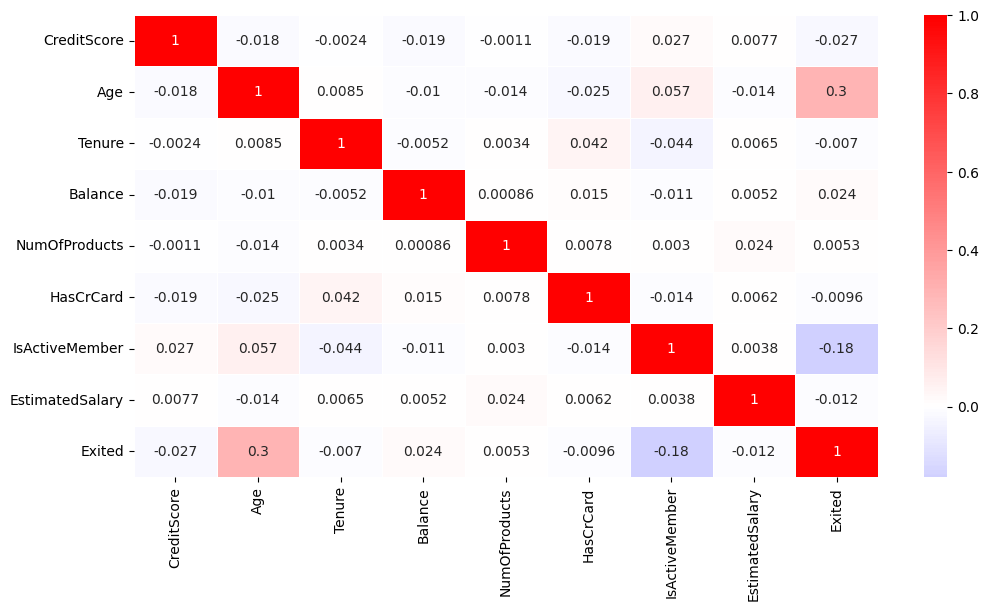

In [58]:
fig,ax = plt.subplots(figsize=(12,6))
sb.heatmap(df_corr, annot=True, linewidths=0.5, center=0, cmap='bwr')
plt.show()

In [59]:
scale = scaler()
x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = \
scale.fit_transform(x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2622,0.509890,Germany,Male,0.136364,0,0.724749,2,1,1,0.385157
6000,0.514286,France,Female,0.287879,10,0.365238,3,0,1,0.125653
6198,0.391209,Germany,Male,0.196970,0,0.512437,1,1,1,0.351921
4938,0.830769,Germany,Male,0.242424,10,0.480293,1,0,0,0.184096
9316,0.340659,Germany,Male,0.469697,0,0.404077,3,1,0,0.307239
...,...,...,...,...,...,...,...,...,...,...
2637,0.553846,France,Female,0.166667,0,0.359859,2,1,0,0.823700
4934,0.604396,France,Female,0.545455,2,0.348299,1,1,1,0.316073
7231,0.351648,France,Male,0.333333,10,0.534607,1,1,1,0.528651
1632,0.487912,France,Male,0.181818,3,0.501372,1,1,0,0.714790


In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# Separate categorical and numerical columns
categorical_columns = ['Geography', 'Gender']  # List of your categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary']  # List of your numerical columns

In [86]:
#x_categorical = x.loc[:, categorical_columns]
#x_numerical = x.loc[:, numerical_columns]

# Apply One-Hot Encoding to categorical variables
#encoder = OneHotEncoder()
#x_categorical_encoded = encoder.fit_transform(x_categorical)

# Apply feature scaling to numerical variables
#scaler = StandardScaler()
#x_numerical_scaled = scaler.fit_transform(x_numerical)

# Combine the encoded categorical variables and scaled numerical variables
#x_scaled = np.hstack((x_categorical_encoded.toarray(), x_numerical_scaled))

# Apply PCA and visualize
#n_components = min(x_scaled.shape[1], 10)  # Limit to the number of columns
#pca = PCA(n_components=n_components)
#principal_components = pca.fit_transform(x_scaled)

# Get the explained variance ratios
#explained_variance_ratios = pca.explained_variance_ratio_

#feature_names = list(x.columns)

# Sort the features based on their explained variance ratios
#sorted_features = np.argsort(explained_variance_ratios)[::-1]


# Print the features and their explained variance ratios
#for i, feature_idx in enumerate(sorted_features):
    #print(f"{i+1}. {feature_names[feature_idx]} - Explained Variance Ratio: {explained_variance_ratios[feature_idx]:.4f}")

In [60]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2622,0.509890,0.136364,0,0.724749,2,1,1,0.385157,0,1,0,0,1
6000,0.514286,0.287879,10,0.365238,3,0,1,0.125653,1,0,0,1,0
6198,0.391209,0.196970,0,0.512437,1,1,1,0.351921,0,1,0,0,1
4938,0.830769,0.242424,10,0.480293,1,0,0,0.184096,0,1,0,0,1
9316,0.340659,0.469697,0,0.404077,3,1,0,0.307239,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,0.553846,0.166667,0,0.359859,2,1,0,0.823700,1,0,0,1,0
4934,0.604396,0.545455,2,0.348299,1,1,1,0.316073,1,0,0,1,0
7231,0.351648,0.333333,10,0.534607,1,1,1,0.528651,1,0,0,0,1
1632,0.487912,0.181818,3,0.501372,1,1,0,0.714790,1,0,0,0,1


In [61]:
from sklearn.preprocessing import StandardScaler #fitting standard scaler
x=StandardScaler().fit_transform(x)

In [62]:
cov = (x.T @ x) / (x.shape[0] - 1) #computing the covariance matrix

In [63]:
eig_values, eig_vectors = np.linalg.eig(cov)

In [64]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

<ipython-input-65-f6398045b482>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

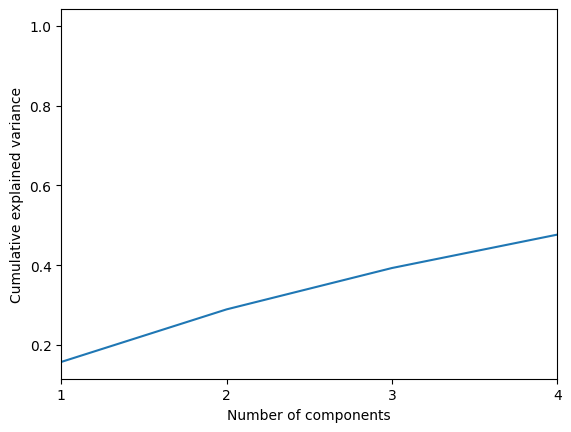

In [65]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [66]:
eig_scores = np.dot(x, sorted_eig_vectors[:, :2])
colors = ["blue", "red", "green"]


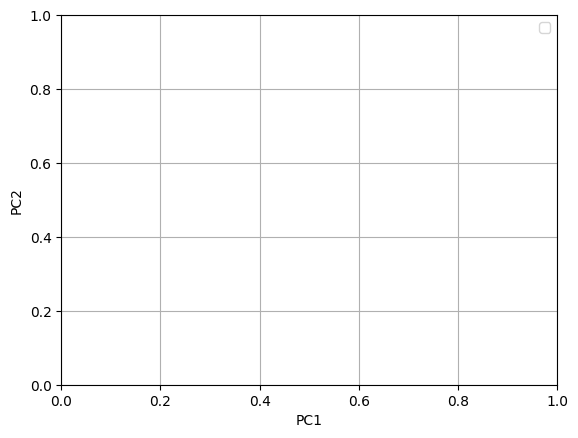

In [67]:
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(cd["target_names"]):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#biplot(eig_scores, sorted_eig_vectors, cd[" "])
plt.legend()